# 1. 데이터 로더
#### https://www.tensorflow.org//api_docs/python/tf/keras/utils/Sequence
#### Batch 기반의 딥러닝 학습 모델을 위해 데이터를 효율적으로 읽어오는 역할
'''  
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import math

Here, `x_set` is list of path to the images
and `y_set` are the associated classes.

class CIFAR10Sequence(Sequence):

    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return math.ceil(len(self.x) / self.batch_size)

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) *
        self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) *
        self.batch_size]

        return np.array([
            resize(imread(file_name), (200, 200))
               for file_name in batch_x]), np.array(batch_y)
'''

In [26]:
from tensorflow import keras
import pandas as pd
import numpy as np
import math
import cv2

In [55]:
class DataGenerator(keras.utils.Sequence) :
    def __init__(self, batch_size, csv_path, fold, image_size, mode='train', shuffle=True) :
        self.batch_size = batch_size
        self.fold = fold
        self.image_size = image_size
        self.mode = mode
        self.shuffle = shuffle
        
        self.df = pd.read_csv(csv_path)
        
        if self.mode == 'train' :
            self.df = self.df[self.df['fold'] != self.fold]
        elif self.mode == 'val' :
            self.df = self.df[self.df['fold'] == self.fold]
            
        self.on_epoch_end()
    
    # sample() : 전체 row(행)에서 몇 %의 데이터를 return 할 것인지 설정
    # frac : 데이터프레임으로 부터 특정 비율로 무작위 표본 추출을 하고 싶으면 0 ~ 1 사이의 부동소수점을 입력
    # reset_index() : drop = True 옵션을 설정하면 인덱스 열을 보통의 자료열로 설정하는 것이 아니라 버림
    def on_epoch_end(self) :
        if self.shuffle :
            self.df = self.df.sample(frac=1).reset_index(drop=True)
    
    # len()
    def __len__(self) :
        return math.ceil(len(self.df) / self.batch_size) # ceil 올림
    
    # 클래스의 인덱스 접근할 떄 자동으로 호출되는 메소드
    def __getitem__(self, idx) :
        start = idx * self.batch_size
        end = (idx+1) * self.batch_size
        data = self.df.iloc[start:end]
        batch_x, batch_y = self.get_data(data)
        
        return np.array(batch_x), np.array(batch_y)
    
    # batch 만큼의 데이터들을 가져온다
    def get_data(self, data) :
        batch_x = []
        batch_y = []
        
        # 데이터 프레임에서 row의 개수만큼 반복
        # 튜플로 리턴(index, 행정보(Series))
        
        for _, r in data.iterrows() :
            file_name = r['file_name']
            image = cv2.imread(f'1_data/images/{file_name}.jpg')
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (self.image_size, self.image_size))
            image = image/255.
            
            label = int(r['species']) -1
            
            batch_x.append(image)
            batch_y.append(label)
        
        return batch_x, batch_y

In [56]:
# __getitem__
# 클래스의 인덱스 접근할 때 자동으로 호출되는 메소드
class GetItemTest :
    def __init__(self):
        print('GetItemTest 클래스의 생성자 !')
        self.numbers = [n for n in range(1, 11)]
        
    def __getitem__(self, index) :
        print('__getitem__ 메소드 호출 !')
        return self.numbers[index]

In [57]:
test1 = GetItemTest()

GetItemTest 클래스의 생성자 !


In [58]:
test1[3]

__getitem__ 메소드 호출 !


4

In [67]:
csv_path = '1_data/kfolds.csv'
#def __init__(self, batch_size, csv_path, fold, image_size, mode='train', shuffle=True)
train_generator = DataGenerator(
    batch_size = 9,
    csv_path = csv_path,
    fold = 1,
    image_size = 256,
    mode = 'train',
    shuffle = True
)

In [68]:
len(train_generator)

654

In [69]:
import matplotlib.pyplot as plt

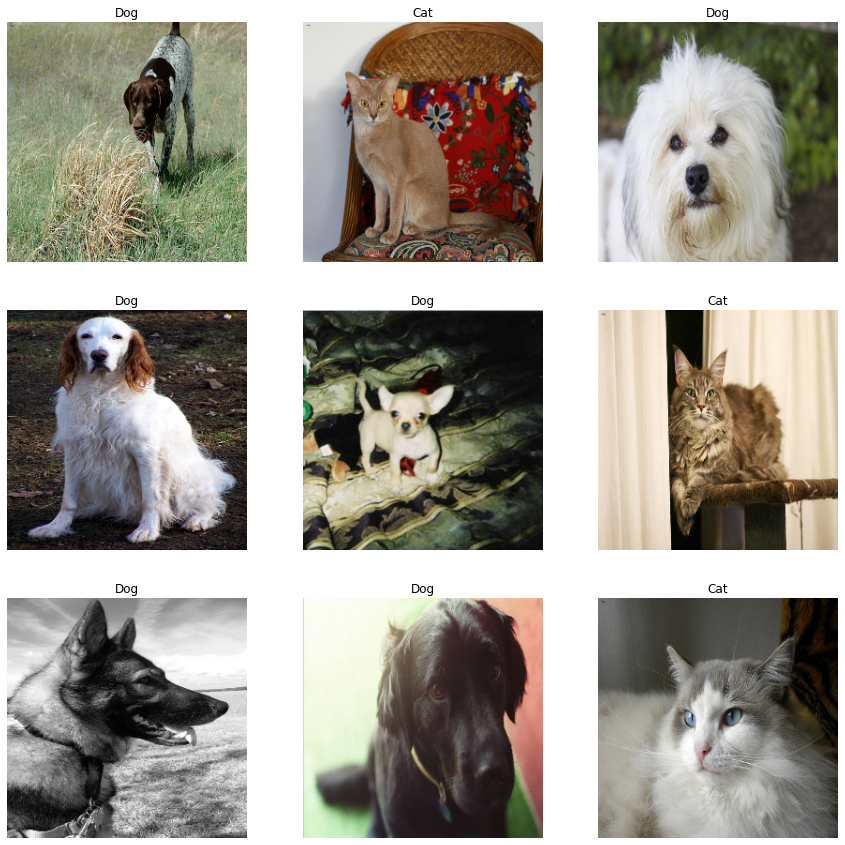

In [71]:
class_name = ['Cat', 'Dog']


for batch in train_generator : # 부모 클래스의 상속으로인해 한 배치씩 데이터를 넘겨준다.
    X, y = batch
    plt.figure(figsize=(15,15))
    
    for i in range(9) :
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(X[i])
        plt.title(class_name[y[i]])
        plt.axis('off')
        
    break